## Introduction:
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

Dataset Name:
Customer Churn

Title:
Telco Customer Churn Data Analysis

Objective:
The objective of analysis is to perform basic Descriptive and EDA on relevant customer data to develop focused customer retention programs.

## About Dataset:
The provided dataset consists of the information below: Demographic information about customers including gender.
* CustomerID: A unique ID that identifies each customer.
* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* Country: The country of the customer’s primary residence.
* State: The state of the customer’s primary residence.
* City: The city of the customer’s primary residence.
* Zip Code: The zip code of the customer’s primary residence.
* Lat Long: The combined latitude and longitude of the customer’s primary residence.
* Latitude: The latitude of the customer’s primary residence.
* Longitude: The longitude of the customer’s primary residence.
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicate if the customer has a partner: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents,   grandparents, etc.
* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of     the quarter specified above.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber       Optic, Cable.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the     company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the         company: Yes, No
* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their         Internet equipment provided by the company: Yes, No
* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with   reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third   party provider: Yes, No. The company does not charge an additional fee for this service.
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party       provider: Yes, No. The company does not charge an additional fee for this service.
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company.       Directly related to Churn Value.
* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company.           Directly related to Churn Label.
* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model          incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The     higher the value, the more valuable the customer. High value customers should be monitored for churn.
* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.


In [2]:
# importing needed libraries and packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
plt.style.use("seaborn")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importoing Dataset
customer = pd.read_excel('Telco_customer_churn.xlsx')

In [4]:
customer.shape

(7043, 33)

In [5]:
customer.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
customer.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


## 1. Data Type of each column as read by python

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## We can see data type of column 'Total charges' is read as object but it should be Numeric.

## Apart from that python is reading count, zipcode and tenure months as decimal values but they are descreate values. 

In [8]:
# converting data type of column 'Total charges' to float
customer['Total Charges'] = pd.to_numeric(customer['Total Charges'],errors = 'coerce')

In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## 2. Basic Statistical Analysis

In [10]:
customer.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


**Statiscal Summary of Numeric Columns**
1. Count : It has only 1 unique value for all records.
2. Latitude & Longitude: This gives unique address of customer’s. 
3. Tenure Months: The total amount of months that the customer taken with the company by the end of the quarter.
  - The Max months is 72. 
  - The average is 32.
4. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.The Max amount 118 and average amount is 68.
5. Total Charges: Indicates the customer’s total charges.
  - The Max amount 8684 
  - Average amount is 2283.
6. Churn Score: 
  - A value from 0-100
  - The higher the score, the more likely the customer will churn.
7. CLTV[Customer Lifetime Value.]: 
  - The higher the value, the more valuable the customer. 
  - High value customers monitored for churn.

In [12]:
customer.describe(include=object)

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,3,2,4,2,20
top,6702-OHFWR,United States,California,Los Angeles,"33.867593, -118.080637",Male,No,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3088,3095,3473,2810,2785,3875,4171,2365,5174,192


## 3. percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

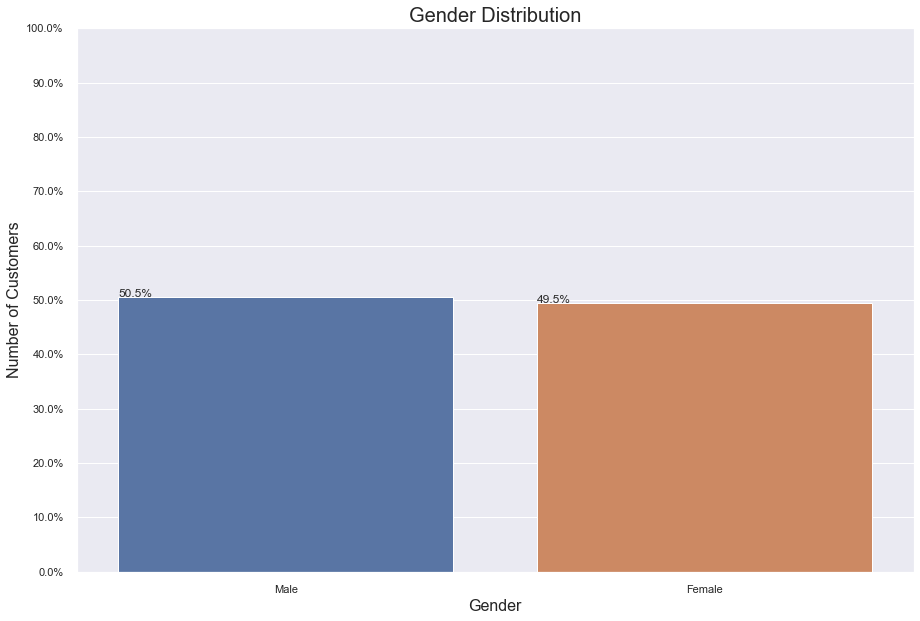

In [63]:
#Gender
plot=sns.countplot(x=customer['Gender'],data=customer)
total=len(customer['Gender'])
#plot.patches gives x,y coordinate,height width and angle and using this i have converted the labels into the perctage
#to make it interpretable.
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.xlabel('Gender',fontsize=16)
plt.ylabel('Number of Customers',fontsize=16)
plt.title('Gender Distribution',fontsize=20);
plt.show()

## As seen in the above graph for the distribution of genders in the data set. we can see that there are 50.5% of Males and 49.5% of Females.


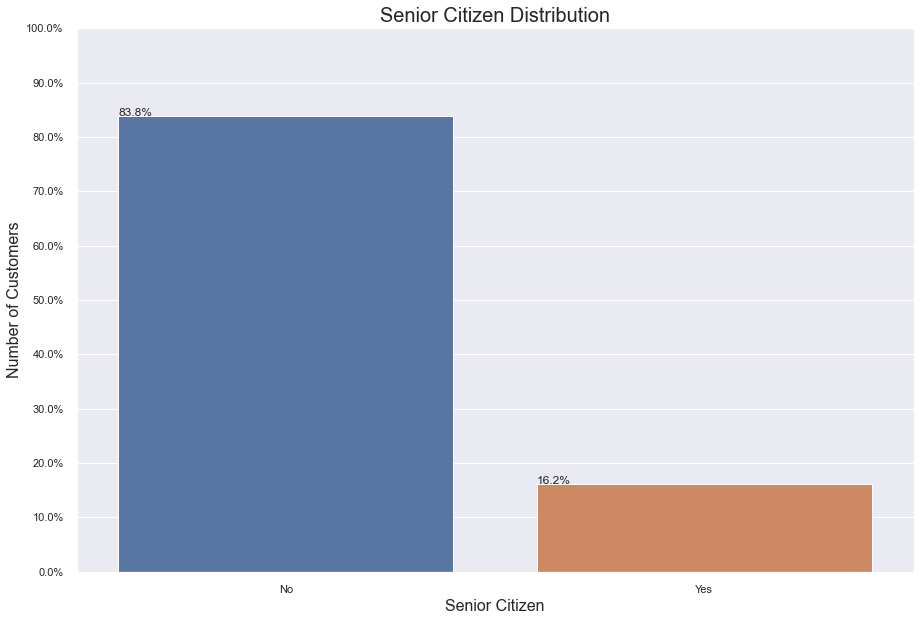

In [64]:
# Senior Citizen
plot=sns.countplot(x=customer['Senior Citizen'],data=customer)
total=len(customer['Senior Citizen'])
#plot.patches gives x,y coordinate,height width and angle and using this i have converted the labels into the perctage
#to make it interpretable.
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.xlabel('Senior Citizen',fontsize=16)
plt.ylabel('Number of Customers',fontsize=16)
plt.title('Senior Citizen Distribution',fontsize=20);
plt.show()

## 4. Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

In [95]:
def plot_hist(column):
    sns.histplot(customer[column], kde=True);
    sns.set(rc = {'figure.figsize':(10,8)})
    plt.axvline(x=np.mean(customer[column]), c='red', label='mean')
    plt.axvline(x=np.median(customer[column]),c='blue',alpha=0.5,ls='--',label='Median')
    plt.xlabel(f'{column}',fontsize=16)
    plt.ylabel('Number of clients',fontsize=16)
    plt.title('Distribution of {}'.format(column),fontsize=20)
    plt.legend(fontsize=14)

In [99]:
def plot_box(column):
    plt.figure(figsize=(5,5))
    sns.boxplot(customer[column])
    plt.title(column.upper())

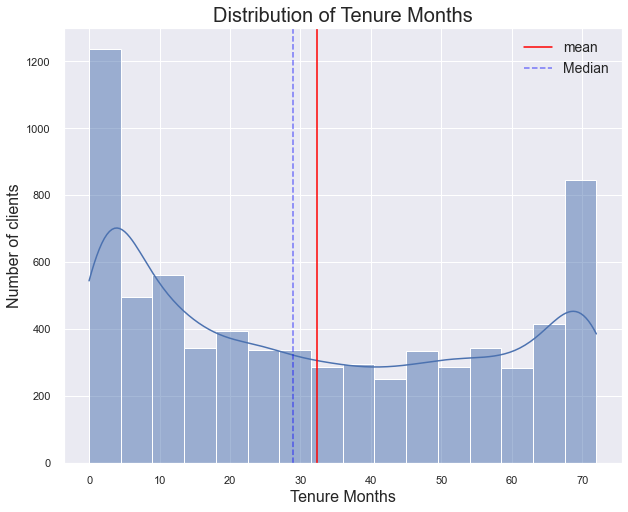

In [100]:
plot_hist('Tenure Months')

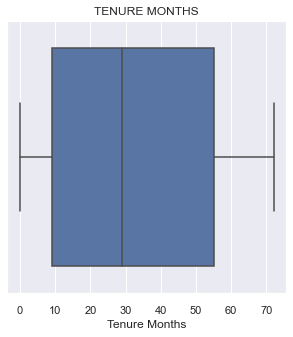

In [101]:
plot_box('Tenure Months')

In [77]:
print('The skewness value is', customer['Tenure Months'].skew(), ', Variable Tenure Month is symmetrical.')

The skewness value is 0.2395397495619829 , Variable Tenure Month is symmetrical.


In [78]:
customer['Tenure Months'].mean()

32.37114865824223

In [79]:
customer['Tenure Months'].median()

29.0

In [80]:
customer['Tenure Months'].std()

24.55948102309432

## From the above plots we can see that there are not outliers in Tenure Months columns also the skewness value is below 0.5 which indicates that the data is Normally distributed. The standard deviation is high which indicates data is spread out around the mean and distribution will be more flat.

## 5. Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [45]:
# Binary Encoding

gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

customer["Gender"] = customer["Gender"].map(gender_map)

def binary_encode(features):
    for feature in features:
        customer[feature] = customer[feature].map(yes_no_map)

In [49]:
# Binary Variables
binary_candidate = ["Gender","Senior Citizen",'Partner','Dependents', "Phone Service","Multiple Lines"
                            ,"Online Security","Online Backup","Device Protection","Tech Support","Streaming TV"
                           ,"Streaming Movies","Paperless Billing", "Churn Label"]
# Apply binary encoding on categorical features that contains only two categories
for column in binary_candidate:
    if column == 'Gender':
        customer[column] = customer[column].apply(lambda row:1 if row == 'Female' else 0) 
                                                #Encoding Male = 0 and Female =1
    else:
        customer[column] = customer[column].apply(lambda row:1 if row == 'Yes' else 0)
                                                    #Encoding No = 0 and Yes =1
# Glimpse of data set after Encoding
customer.head()
    

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,...,Month-to-month,0,Mailed check,53.85,108.15,0,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,Month-to-month,0,Electronic check,70.70,151.65,0,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,Month-to-month,0,Electronic check,99.65,820.50,0,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,Month-to-month,0,Electronic check,104.80,3046.05,0,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,...,Month-to-month,0,Bank transfer (automatic),103.70,5036.30,0,1,89,5340,Competitor had better devices


## 6. Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 


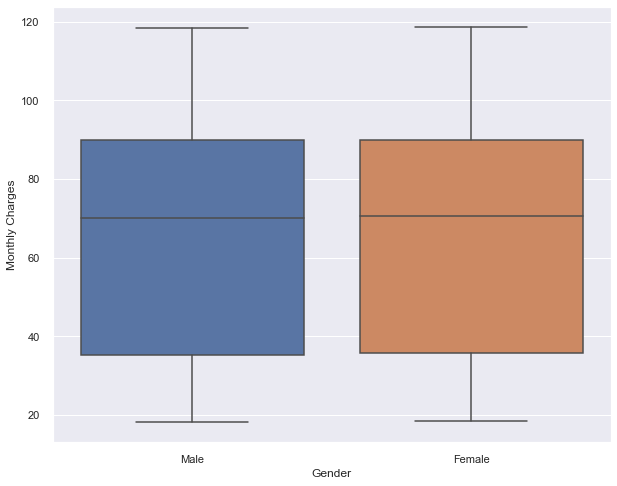

In [102]:
ax = sns.boxplot(x="Gender", y="Monthly Charges", data=customer)


## Distribvution of Monthly charges between Males and females are shown using box plot. It clearly shows that for both males and females monthly charges varies around 37 to 85.

## As the median for both males and females lies approximately on same monthly charges. we can conclude that there is no variation in monthly charges based on gender



## 7. Please find what is the minimum total charges for Los Angeles city.

In [13]:
# Filtering Data for los Angeles City
customer_city = customer.loc[customer['City']=='Los Angeles']
sorted(customer_city['Total Charges'])

[18.8,
 19.2,
 20.1,
 20.15,
 20.15,
 20.2,
 20.3,
 29.85,
 30.2,
 34.7,
 39.65,
 52.0,
 70.25,
 75.55,
 150.85,
 186.05,
 196.4,
 212.3,
 241.3,
 251.65,
 314.95,
 316.2,
 318.6,
 358.15,
 387.9,
 389.25,
 416.4,
 417.75,
 425.1,
 426.65,
 454.0,
 465.7,
 469.65,
 527.5,
 535.35,
 564.65,
 768.05,
 804.85,
 908.75,
 910.45,
 943.0,
 947.75,
 958.1,
 999.8,
 1011.05,
 1079.05,
 1161.75,
 1190.5,
 1215.8,
 1261.0,
 1461.45,
 1620.2,
 1655.35,
 1714.95,
 1873.7,
 1943.9,
 2093.9,
 2104.55,
 2106.05,
 2369.7,
 2511.55,
 3019.1,
 3169.55,
 3522.65,
 3653.0,
 3656.25,
 3708.4,
 3770.0,
 3870.3,
 4448.8,
 4707.85,
 4869.35,
 5044.8,
 5597.65,
 6152.4,
 6161.9,
 6273.4,
 6669.05,
 6743.55,
 7051.95,
 7634.25,
 nan,
 39.8,
 44.1,
 44.15,
 45.25,
 46.3,
 50.15,
 54.65,
 54.9,
 59.2,
 63.15,
 69.15,
 69.9,
 74.5,
 76.45,
 78.45,
 80.8,
 85.45,
 93.7,
 97.0,
 99.75,
 108.05,
 108.15,
 108.7,
 116.85,
 118.3,
 123.65,
 134.5,
 138.85,
 144.15,
 146.9,
 151.65,
 153.3,
 155.65,
 174.65,
 181.65,
 2

In [14]:
# Minimum total charge for Los Angeles
customer_city['Total Charges'].min()

18.8

### Please find which zip code has the maximum total charges.

In [15]:
customer_zipcode = customer.loc[customer['Total Charges'] == customer['Total Charges'].max()]

In [16]:
customer_zipcode[['Zip Code','Total Charges']]

,Zip Code,Total Charges
1206,95519,8684.8


In [17]:
sorted(customer['Total Charges'],reverse=True)[0]

8684.8

## 8. Please find which payment method has the highest churn score and which has the lowest churn score.

In [18]:
# Filtering data for Maximum Churn Score
customer_highchurn = customer.loc[customer['Churn Score'] == customer['Churn Score'].max()]

In [19]:
customer_highchurn[['Churn Score','Payment Method']].value_counts()

Churn Score  Payment Method           
100          Electronic check             28
             Mailed check                  9
             Bank transfer (automatic)     8
             Credit card (automatic)       5
dtype: int64

## Maximum Churn Score is 100 and Payment method which has maximum churn score is Electronic check (28 times)  

In [20]:
customer_lowchurn = customer.loc[customer['Churn Score'] == customer['Churn Score'].min()]

In [21]:
customer_lowchurn[['Churn Score','Payment Method']].value_counts()

Churn Score  Payment Method         
5            Credit card (automatic)    1
dtype: int64

### Minimum Churn Score is 5 and Payment method which has minimum churn score is credit card (automatic)

## 9. Please create an appropriate plot to check the count of payment methods and explain it.

In [22]:
customer['Payment Method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

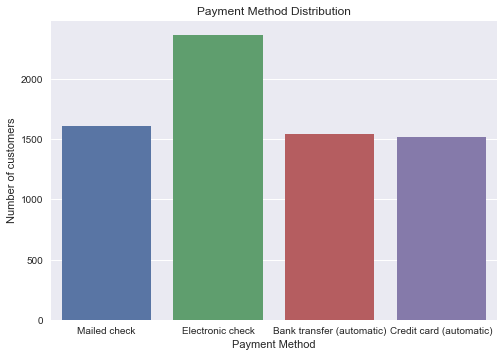

In [23]:
ax = sns.countplot(x=customer['Payment Method'], data = customer)
ax.set_ylabel('Number of customers')
ax.set_xlabel('Payment Method')
ax.set_title('Payment Method Distribution')
plt.show()

### Electronic check payment method is preferred most by the customers and credit card is preferred least as payment method

## 10. Please create an appropriate plot to see the relationship between monthly charges and total charges.

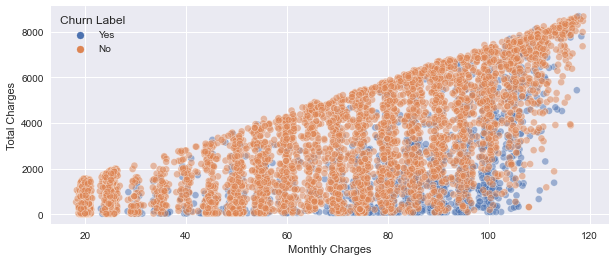

In [161]:
plt.figure(figsize=(10,4))
plt.title="The relationship between monthly charges and total charges."
sns.scatterplot(data= customer,x='Monthly Charges',y='Total Charges',hue='Churn Label', linewidth=0.5,alpha=0.5,palette="deep");

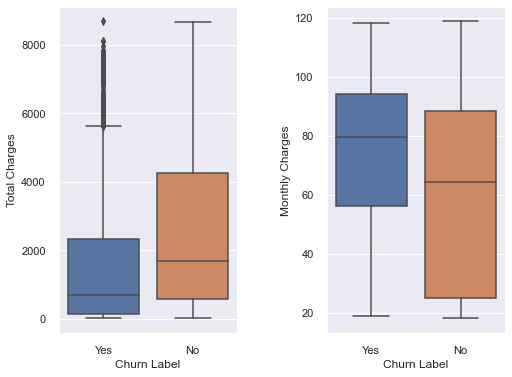

In [143]:
_, ax = plt.subplots(1, 2, figsize= (8, 6))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = 'Churn Label',  y = 'Total Charges', data = customer, ax=ax[0])
sns.boxplot(x = 'Churn Label',  y = 'Monthly Charges', data = customer, ax=ax[1]);

## Median of monthly charges are higher for churn label Yes whereas median for total charges in a quater is higher for churn label No